In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.special as sps
from scipy import *

from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import normalized_mutual_info_score

In [2]:
path = 'D://Michael//Data//Ratings//'
name = 'Correlation_ERNewAAPL'
corrtype = ['spearman', 'pearson']
corr_m = pd.read_csv(path + name + '.csv')
corr_m
corr_m = corr_m.dropna()
corr_m = corr_m.drop(columns = ['Ticker', 'Date/Time'])
corr_m

,Price,ROC/VQ(Shift252),PVQ,VQ,EpsRank,EPSNEW1,EPSNEW2
1782,12.85665,0.23988,3.0,23.17966,5.0,2.0,2.0
1783,13.65941,0.06920,3.0,23.17966,5.0,2.0,2.0
1784,13.59733,0.17183,3.0,23.17966,5.0,2.0,2.0
1785,13.67837,0.13124,3.0,23.17966,5.0,2.0,2.0
1786,13.85360,0.06235,3.0,23.10028,5.0,2.0,2.0
...,...,...,...,...,...,...,...
4333,150.62000,0.34134,2.0,25.98569,5.0,5.0,5.0
4334,155.09000,0.22059,2.0,25.98569,5.0,5.0,5.0
4335,159.59000,0.10586,2.0,25.98569,5.0,5.0,5.0
4336,160.62000,0.08050,2.0,25.98569,5.0,5.0,5.0


In [3]:
corr = corr_m.corr(method = 'pearson')
corr

,Price,ROC/VQ(Shift252),PVQ,VQ,EpsRank,EPSNEW1,EPSNEW2
Price,1.000000,-0.046489,-0.105724,0.712103,-0.337243,0.570226,0.605935
ROC/VQ(Shift252),-0.046489,1.000000,0.836404,-0.236634,-0.293105,0.210786,0.163772
PVQ,-0.105724,0.836404,1.000000,-0.195003,-0.243596,0.204154,0.133454
VQ,0.712103,-0.236634,-0.195003,1.000000,-0.189409,0.137879,0.248048
EpsRank,-0.337243,-0.293105,-0.243596,-0.189409,1.000000,-0.183457,-0.230545
EPSNEW1,0.570226,0.210786,0.204154,0.137879,-0.183457,1.000000,0.847316
EPSNEW2,0.605935,0.163772,0.133454,0.248048,-0.230545,0.847316,1.000000


spearman
pearson


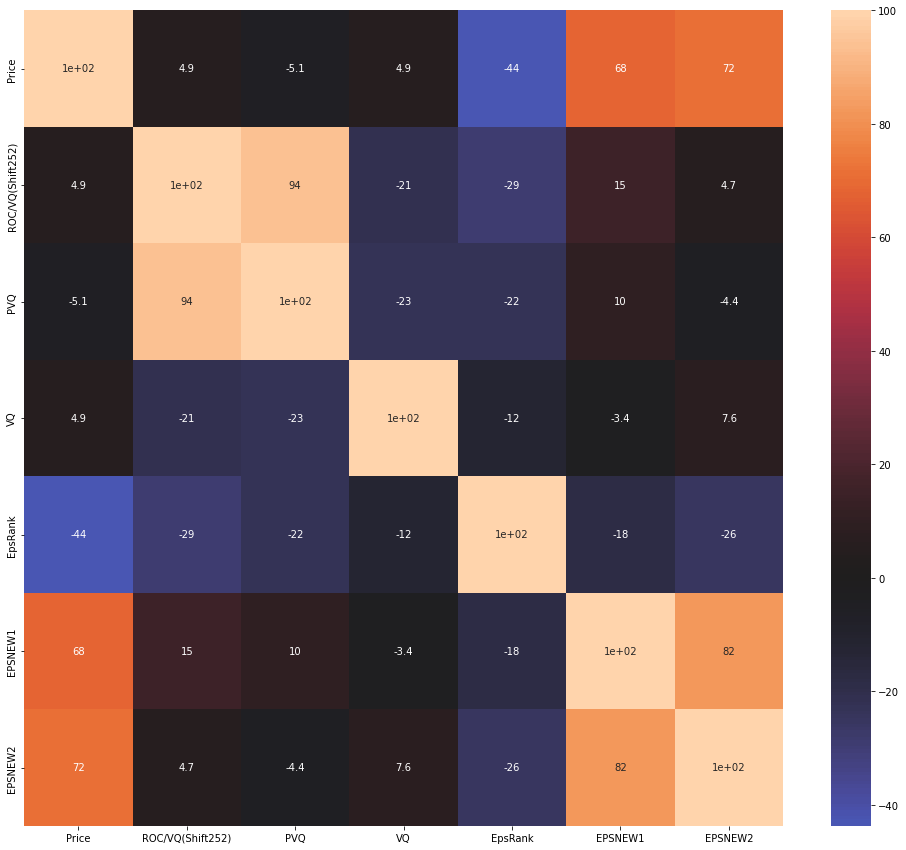

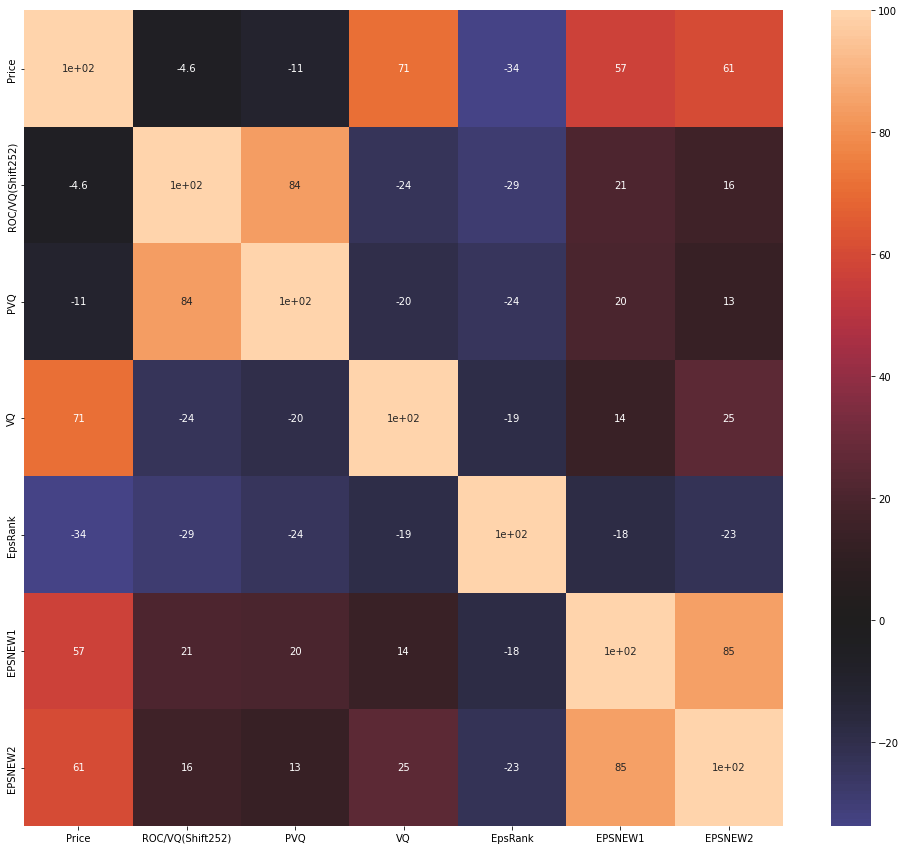

In [7]:
path = 'D://Michael//Data//Ratings//'
name = 'Correlation_ERNewAAPL'
corrtype = ['spearman', 'pearson']
corr_m = pd.read_csv(path + name + '.csv')
corr_m
corr_m = corr_m.dropna()
corr_m = corr_m.drop(columns = ['Ticker', 'Date/Time'])

for i in corrtype:
    print(i)
    typecorr = i
    corr = corr_m.corr(method = i)
    corr = corr*100
    corr = corr.round(decimals = 1)
    plt.figure(figsize=(17,15))
    sns.heatmap(corr, center=0, annot=True)
    plt.savefig(path + 'Correlation figure//' + name + '_' + typecorr + '.png')

In [52]:
corr_p = pd.read_csv('D://Michael//Data//Ratings//Correlation_ROCRef21.csv')
corr_p = corr_p.dropna()
corr_p = corr_p.drop_duplicates(subset=['Ticker'])
corr_p

,Ticker,Date/Time,ROC,VQ,BillionaireRank,NewsletterRank,EpsRank,FScoreRank,HealthRank,HealthTrendRank,SectorRank,TimingRank,StrategyRank,LikeFolioRank,RsiRankRank,G-Indicator
2604,A,3/12/2010,14.25641,29.73795,5.0,3.0,2.0,3.0,5.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0
5631,AAON,1/4/2016,-8.09128,25.45118,4.0,3.0,4.0,4.0,5.0,3.0,3.0,3.0,3.0,3.0,4.0,5.0
8497,AAT,3/29/2017,-5.82330,14.84670,4.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,3.0,3.0,4.0,2.0
9760,AAPL,11/29/2004,31.13623,31.89864,5.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3.0,4.0,1.0
15465,AAP,5/30/2008,16.20531,23.91219,4.0,3.0,4.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7710317,ZION,7/1/2004,0.93828,18.33394,4.0,3.0,5.0,4.0,5.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0
7714206,ZNGA,4/11/2018,-5.86667,24.77534,4.0,3.0,4.0,4.0,5.0,2.0,3.0,3.0,3.0,3.0,4.0,3.0
7717640,ZTS,5/30/2019,0.48115,14.54814,5.0,4.0,4.0,3.0,5.0,4.0,5.0,3.0,4.0,3.0,4.0,5.0
7719192,ZVO,9/28/2017,9.61538,27.46846,4.0,3.0,2.0,3.0,1.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\m.astoshonok\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\m.astoshonok\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\Users\m.astoshonok\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  

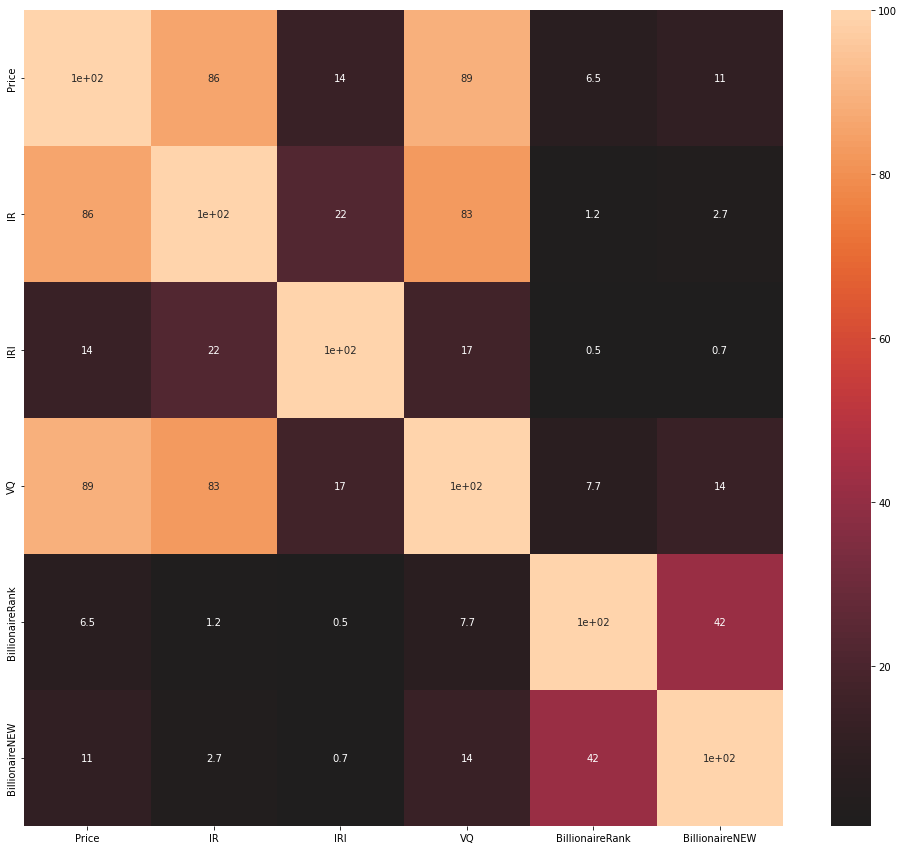

In [26]:
path = 'D://Michael//Data//Ratings//'
name = 'Correlation_BRNew'

corr_m = pd.read_csv(path + name + '.csv')
corr_m
corr_m = corr_m.dropna()
corr_m = corr_m.drop(columns = ['Ticker', 'Date/Time'])
corrNMI = pd.DataFrame(columns = corr_m.columns, index = corr_m.columns)
for i in range(0, corr_m.shape[1]):
    for j in range(0, corr_m.shape[1]):
        corrNMI.iloc[i, j] =  float(normalized_mutual_info_score(corr_m.iloc[:,i], corr_m.iloc[:,j]))
corrNMI = corrNMI*100
corrNMI = corrNMI.astype('float64')
corrNMI = corrNMI.round(decimals=1)
plt.figure(figsize=(17,15))
sns.heatmap(corrNMI, center=0, annot=True)
plt.savefig(path + 'Correlation figure//' + name + '_' + 'NMI' + '.png')